# Loading your dataset from kaggle

In [2]:
import pandas as pd
fake = pd.read_csv("Dataset/Fake.csv")
true = pd.read_csv("Dataset/True.csv")

# Merging fake and true dataset into one dataset for traing and testing of our model.

# Adding Label
fake['Label'] = 1
true['Label'] = 0

# To combine we have use the concat method
df = pd.concat([fake, true], axis=0)

# Now to shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)



# Performing EDA

Shape: (44898, 5)
Columns: Index(['title', 'text', 'subject', 'date', 'Label'], dtype='object')
title      object
text       object
subject    object
date       object
Label       int64
dtype: object
title      0
text       0
subject    0
date       0
Label      0
dtype: int64
Duplicate rows: 0


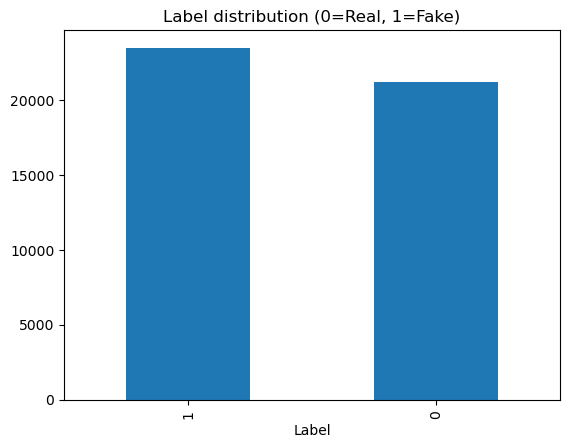

Average text length: 404.966501823715
count    44689.000000
mean       404.966502
std        351.573770
min          0.000000
25%        203.000000
50%        362.000000
75%        512.000000
max       8135.000000
Name: text_length, dtype: float64


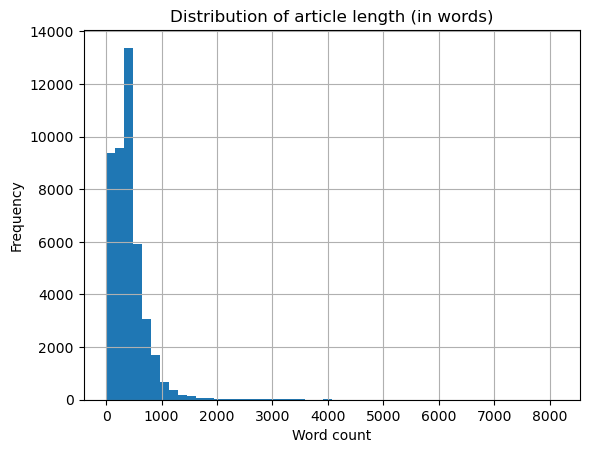

Top words in REAL news:
[('the', 22821), ('to', 11722), ('of', 9739), ('a', 9555), ('and', 8686), ('in', 8517), ('s', 6529), ('on', 5112), ('said', 4647), ('that', 4242), ('for', 3732), ('is', 2665), ('with', 2621), ('he', 2582), ('trump', 2444), ('it', 2387), ('was', 2311), ('as', 2280), ('by', 2248), ('has', 2189)]

Top words in FAKE news:
[('the', 22983), ('to', 12158), ('of', 9912), ('and', 9621), ('a', 9233), ('in', 7269), ('that', 6358), ('s', 5827), ('is', 4603), ('for', 3812), ('it', 3537), ('on', 3534), ('he', 3380), ('trump', 3379), ('was', 2856), ('with', 2754), ('as', 2441), ('his', 2425), ('this', 2387), ('be', 2118)]


In [3]:
# Shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns)

# Data types
print(df.dtypes)

# Missing values
print(df.isnull().sum())

# Dropping Duplicates values
df = df.drop_duplicates()

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

# Checking the balance between fake and true news using bar chart.
import matplotlib.pyplot as plt

df['Label'].value_counts().plot(kind='bar', title="Label distribution (0=Real, 1=Fake)")
plt.show()

# Checking the text length
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

print("Average text length:", df['text_length'].mean())
print(df['text_length'].describe())

# Plot distribution
df['text_length'].hist(bins=50)
plt.title("Distribution of article length (in words)")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.show()

# Now looking for most common words in both fake and true news.

from collections import Counter
import re

def get_top_n_words(corpus, n=20):
    words = " ".join(corpus).lower()
    words = re.findall(r'\w+', words)
    return Counter(words).most_common(n)

print("Top words in REAL news:")
print(get_top_n_words(df[df['Label']==0]['text'].head(1000)))

print("\nTop words in FAKE news:")
print(get_top_n_words(df[df['Label']==1]['text'].head(1000)))
# So no specific word is common in True or fake news tops words in both are common words like:- "is, are, of , the, etc"





# Preprocessing & Feature Engineering


In [4]:
# Preprocessing (Cleaning raw data )

# Lowercasing
df['text'] = df['text'].astype(str).str.lower()

# Remove punctuation & numbers
import re

def remove_punct(text):
    return re.sub(r'[^a-z\s]', '', text)

df['text'] = df['text'].apply(remove_punct)

df['text'].head(10)






0    st century wire says ben stein reputable profe...
1    washington reuters  us president donald trump ...
2    reuters  puerto rico governor ricardo rossello...
3    on monday donald trump once again embarrassed ...
4    glasgow scotland reuters  most us presidential...
5    on wednesday democrats took a powerful stance ...
6    president trump s rally in fl on saturday was ...
7    he s been europe s version of the outspoken te...
8    washington reuters  the state department said ...
9     this version of the story corrects the figure...
Name: text, dtype: object

# Splitting our data into Train, Test and Validation split

In [5]:
from sklearn.model_selection import train_test_split

# X = features(input) (text), y = labels(output)
X = df['text']   # cleaned text column
y = df['Label']  # 0 = real, 1 = fake

# Step 1: Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Step 2: Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


Train size: 31282
Validation size: 6703
Test size: 6704
